In [82]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
data = []

with open('chronic_kidney_disease_full.arff', "r") as f:
   for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))

names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class','no_name']
    
ckd_data = pd.DataFrame(data[145:], columns=names)

In [3]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None


In [5]:
ckd_data.replace("?", pd.NA, inplace=True)

numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 
                'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
ckd_data[numeric_cols] = ckd_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 
                    'appet', 'pe', 'ane', 'class']
ckd_data[categorical_cols] = ckd_data[categorical_cols].apply(lambda x: x.str.strip().str.lower())

In [6]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      391 non-null    float64
 1   bp       388 non-null    float64
 2   sg       353 non-null    float64
 3   al       354 non-null    float64
 4   su       351 non-null    float64
 5   rbc      248 non-null    object 
 6   pc       335 non-null    object 
 7   pcc      396 non-null    object 
 8   ba       396 non-null    object 
 9   bgr      356 non-null    float64
 10  bu       381 non-null    float64
 11  sc       383 non-null    float64
 12  sod      313 non-null    float64
 13  pot      312 non-null    float64
 14  hemo     348 non-null    float64
 15  pcv      329 non-null    float64
 16  wbcc     294 non-null    float64
 17  rbcc     269 non-null    float64
 18  htn      398 non-null    object 
 19  dm       398 non-null    object 
 20  cad      398 non-null    object 
 21  appet    399 non

In [7]:
ckd_data.isnull().sum().sort_values(ascending=False)

no_name    399
rbc        154
rbcc       133
wbcc       108
pot         90
sod         89
pcv         73
pc          67
hemo        54
su          51
sg          49
al          48
bgr         46
bu          21
sc          19
bp          14
age         11
ba           6
pcc          6
htn          4
dm           4
cad          4
appet        3
pe           3
ane          3
class        2
dtype: int64

In [ ]:
ckd_data.drop(columns='no_name', inplace=True, axis=1)

In [9]:
fill_with_median = [col for col in numeric_cols ]
ckd_data[fill_with_median]=ckd_data[fill_with_median].fillna(ckd_data[fill_with_median].median())

ckd_data[categorical_cols]=ckd_data[categorical_cols].fillna(ckd_data[categorical_cols].mode().iloc[0])

In [10]:
ckd_data['class'] = ckd_data['class'].replace('no', 'notckd')
ckd_data['appet'] = ckd_data['appet'].replace('no', 'poor')
ckd_data['dm']   = ckd_data['dm'].replace('', 'no')
ckd_data['pe']  = ckd_data['pe'].replace('good', 'yes')

In [11]:
ckd_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.00000
mean,51.579602,76.592040,1.017724,0.895522,0.393035,144.942786,56.619900,2.988682,137.633085,4.576368,12.543035,39.087065,8297.014925,4.73806
std,16.942322,13.458266,0.005423,1.311385,1.037814,75.091992,49.282795,5.616104,9.183381,2.814341,2.709718,8.142122,2523.365335,0.83935
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.10000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.250000,27.250000,0.900000,135.000000,4.000000,10.900000,34.000000,7000.000000,4.50000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.80000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,60.750000,2.700000,141.000000,4.800000,14.600000,44.000000,9375.000000,5.10000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.00000


In [91]:
ckd_data.to_csv("chronic_kidney_disease.csv", index=False)

### Distribution of the numerical features

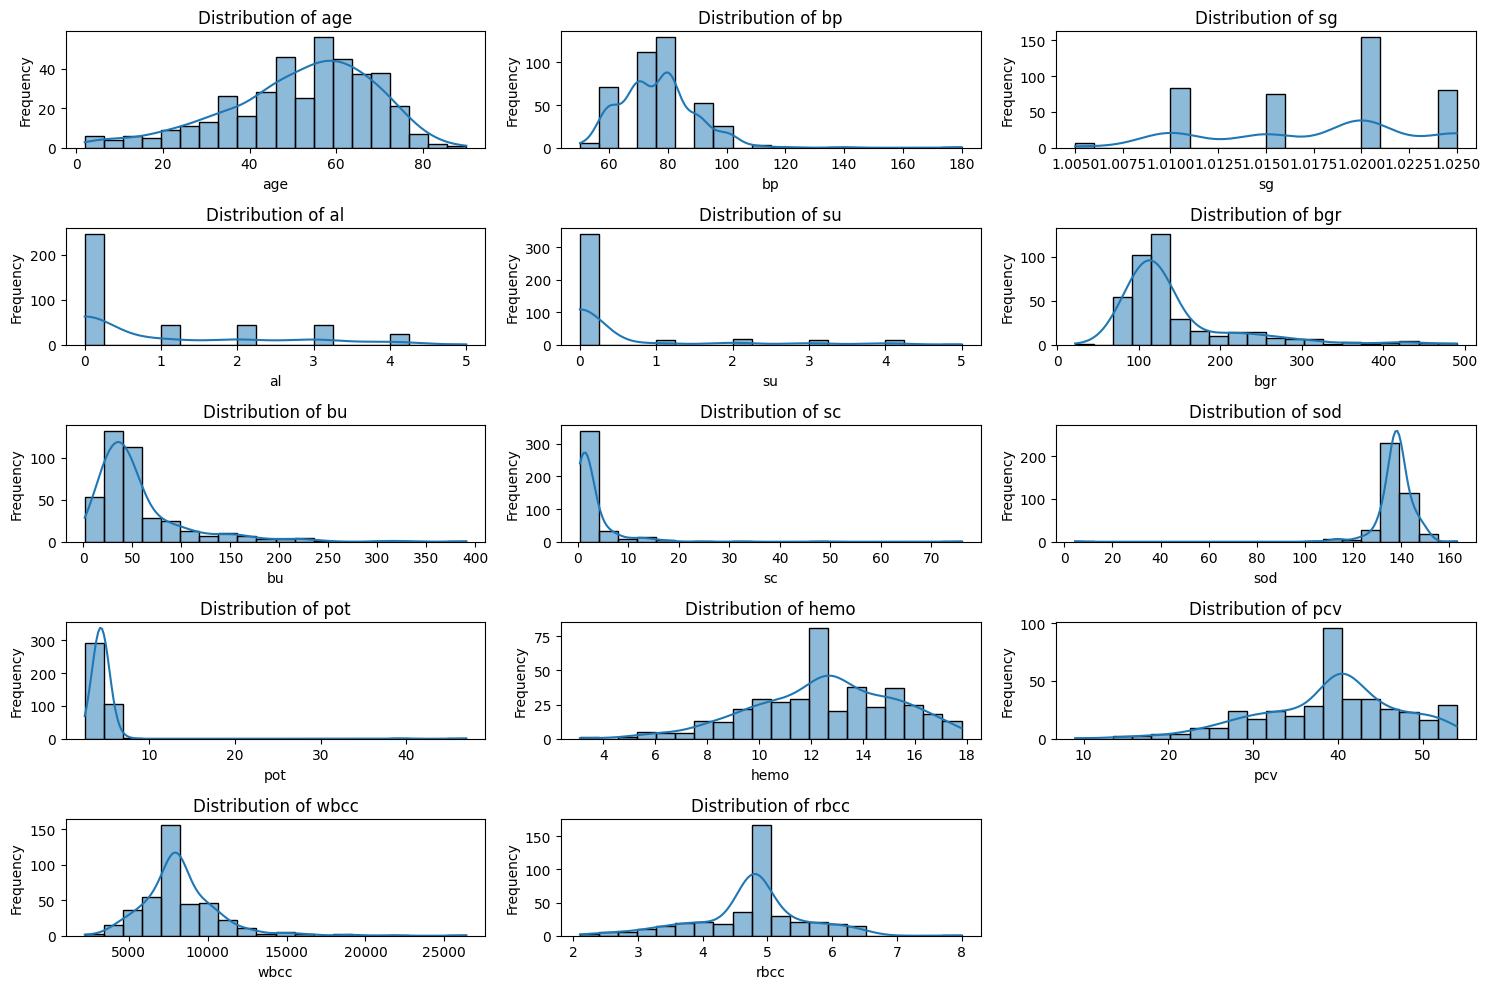

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(ckd_data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of the categorical features

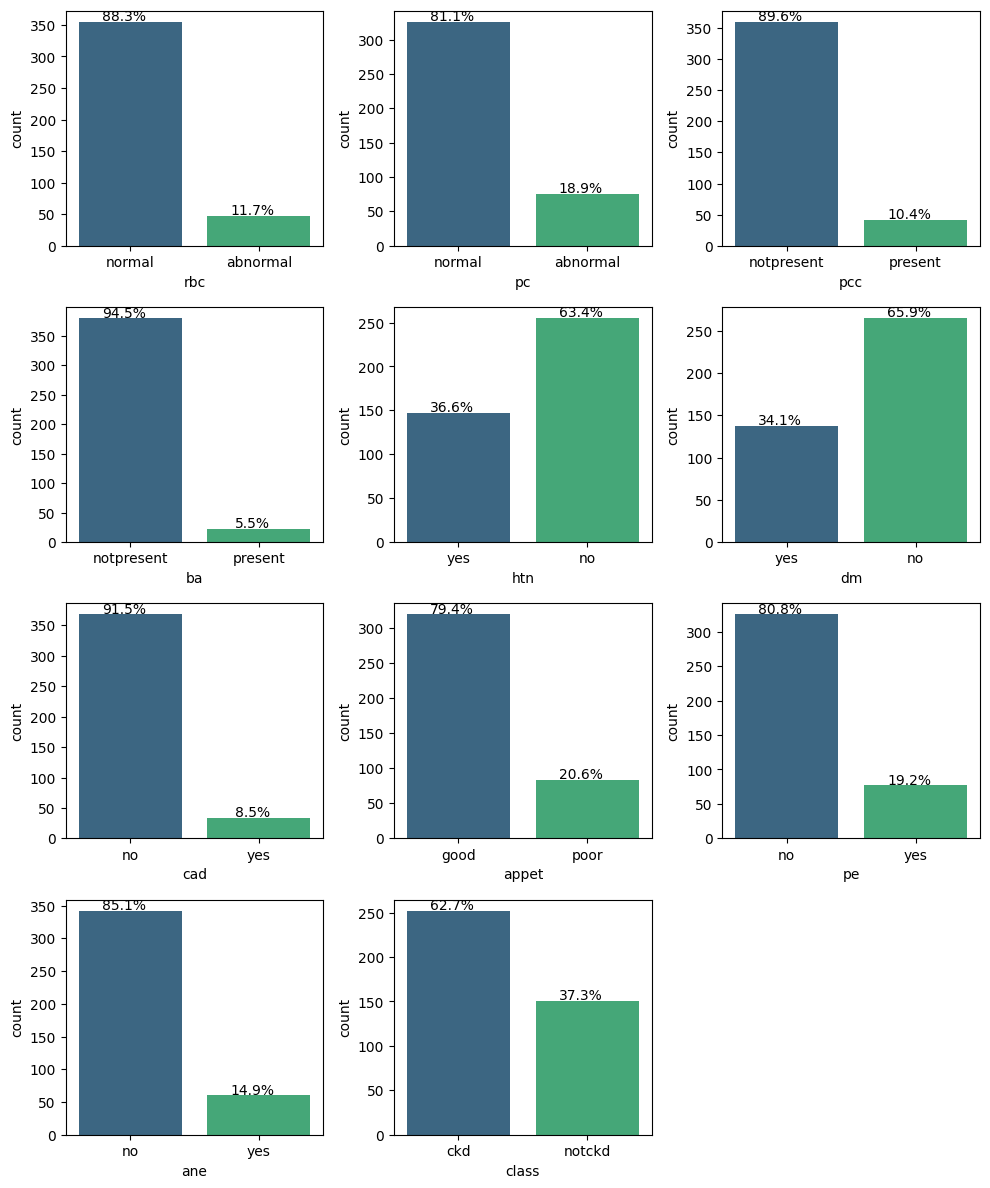

In [ ]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)  
    ax=sns.countplot(data=ckd_data, x=col, palette='viridis') 
    total = len(ckd_data[categorical_cols]) 
    for p in ax.patches:
         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
         x = p.get_x() + p.get_width() / 2 - 0.05
         y = p.get_y() + p.get_height() + 2
         ax.annotate(percentage, (x, y), ha='center', fontsize=10, color='black')


plt.tight_layout()  
plt.show()

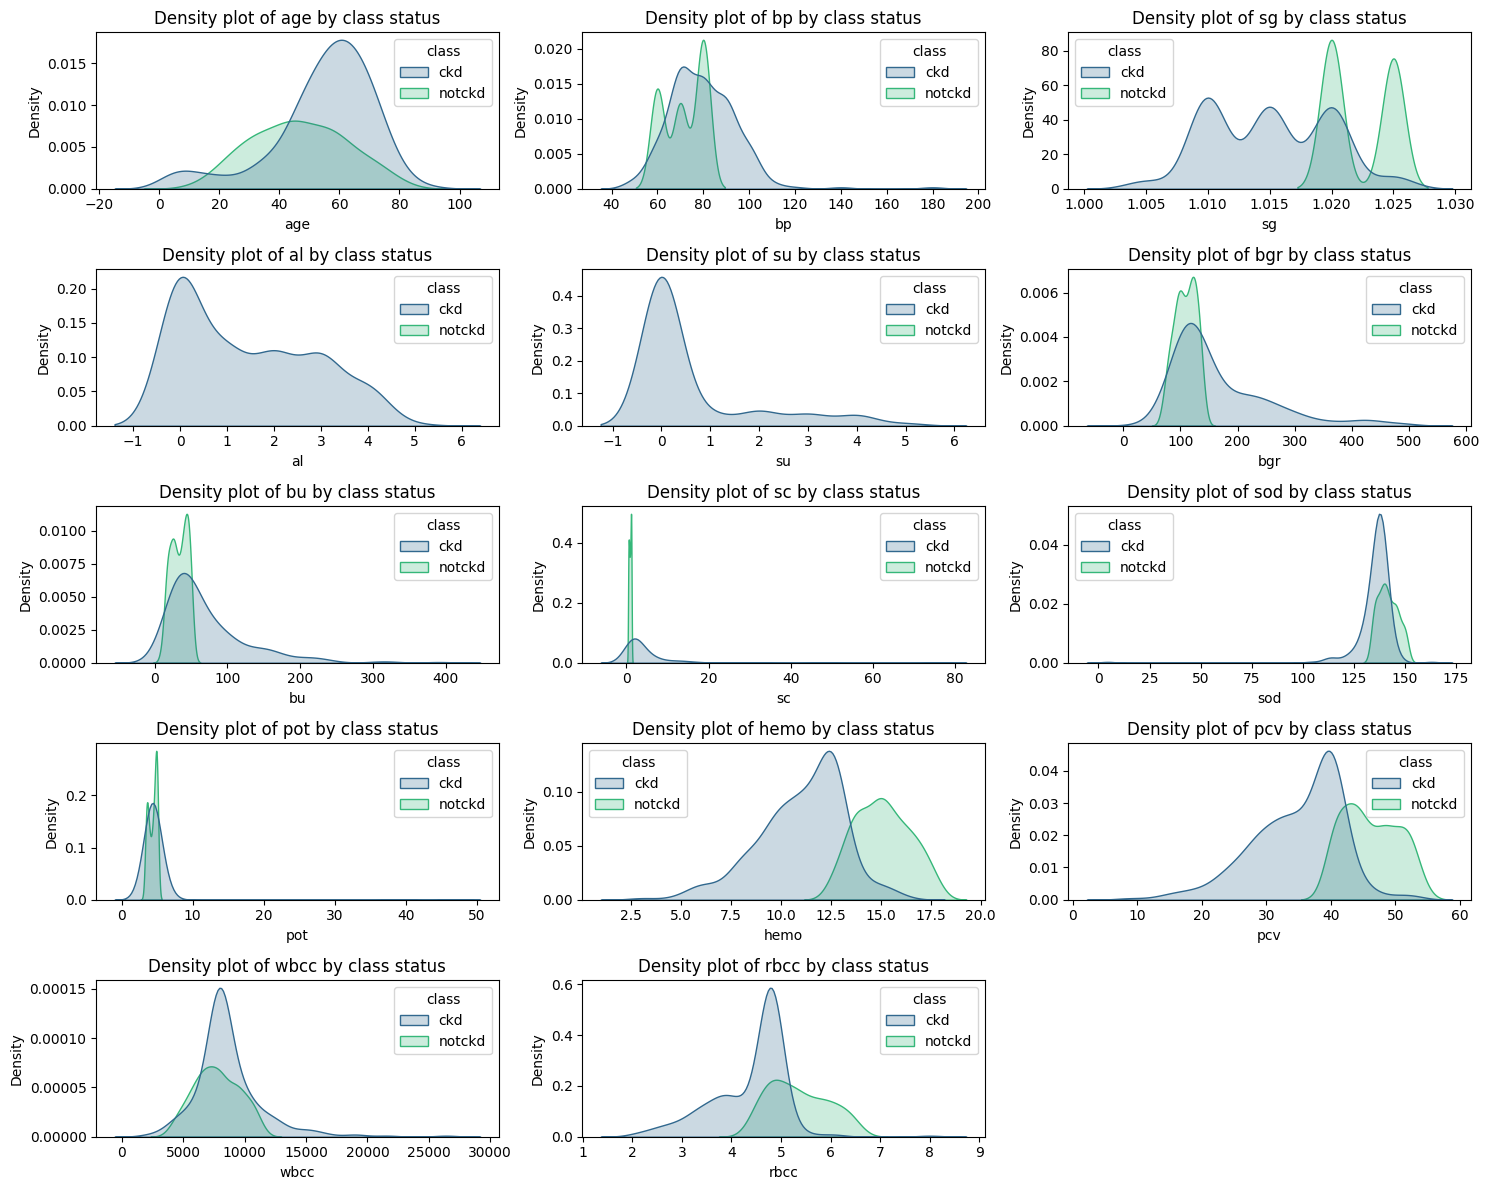

In [14]:
plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.kdeplot(data=ckd_data, x=col, hue='class', fill=True, palette='viridis', warn_singular=False)
    plt.title(f'Density plot of {col} by class status')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

def chi_square_with_class(data, categorical_cols, target_col='class'):
    results = []

    for col in categorical_cols:
        if col != target_col: 
            table = pd.crosstab(data[col], data[target_col])
            chi2, p, dof, expected = chi2_contingency(table)
            results.append((col, target_col, chi2, p))

    results_data = pd.DataFrame(results, columns=['Variable', 'Compared with', 'Chi-Square', 'p-value'])
    
    return results_data


chi_results = chi_square_with_class(ckd_data, categorical_cols)
print(chi_results.sort_values(by="p-value"))

  Variable Compared with  Chi-Square       p-value
4      htn         class  135.437793  2.648364e-31
5       dm         class  121.298088  3.288202e-28
7    appet         class   56.374442  5.990398e-14
1       pc         class   53.834607  2.180971e-13
8       pe         class   50.927271  9.585255e-13
9      ane         class   40.125784  2.381251e-10
0      rbc         class   29.899393  4.550552e-08
2      pcc         class   26.163734  3.136582e-07
6      cad         class   20.399635  6.284178e-06
3       ba         class   12.217184  4.735134e-04


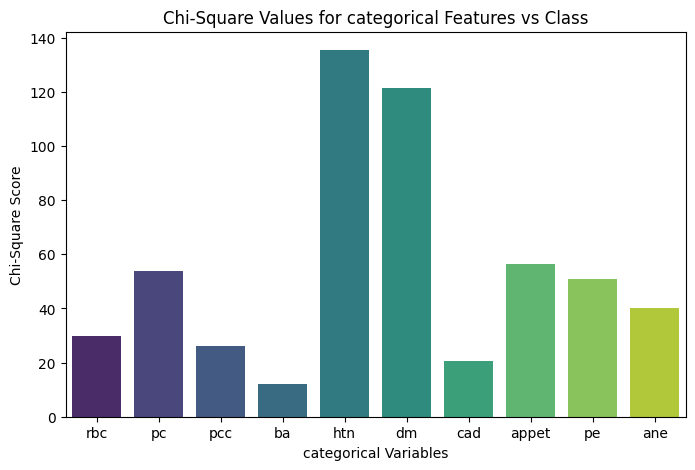

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=chi_results['Variable'], y=chi_results['Chi-Square'], palette='viridis')
plt.title("Chi-Square Values for categorical Features vs Class")
plt.ylabel("Chi-Square Score")
plt.xlabel("categorical Variables")
plt.show()

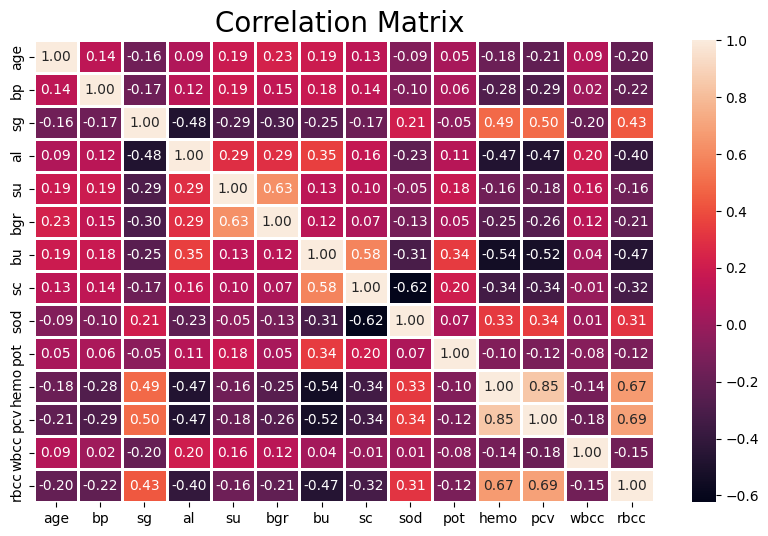

In [19]:
corr_matrix = ckd_data.corr(numeric_only=True)
plt.figure(figsize = (10, 6))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix ", fontsize = 20)
plt.show()

### Model building 

In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
ckd_m_data = ckd_data.copy()

encoder = LabelEncoder()

ckd_m_data[categorical_cols] = ckd_m_data[categorical_cols].apply(encoder.fit_transform)
ckd_m_data[categorical_cols].head(2)

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0


In [90]:
ckd_m_data.to_csv("clean_chronic_kidney_disease.csv", index=False)

In [ ]:
x = ckd_m_data.drop(columns=['class'])
y = ckd_m_data['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      1.00      0.99        34

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Cross-validation scores: [1.         0.95945946 0.98648649 1.         0.97297297]
Mean CV score: 0.9837837837837838
Confusion Matrix for Logistic Regression:
[[66  1]
 [ 0 34]]


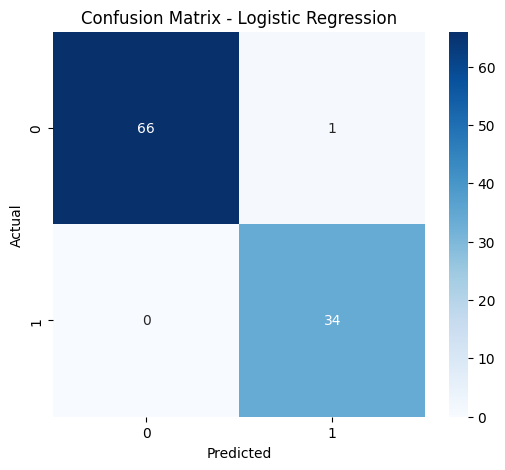


For class 0:
  True Positives (TP): 66
  False Positives (FP): 0
  False Negatives (FN): 1
  True Negatives (TN): 34

For class 1:
  True Positives (TP): 34
  False Positives (FP): 1
  False Negatives (FN): 0
  True Negatives (TN): 66
Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        34

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Cross-validation scores: [0.98648649 1.         0.95945946 1.         1.        ]
Mean CV score: 0.9891891891891891
Confusion Matrix for Random Forest:
[[67  0]
 [ 0 34]]


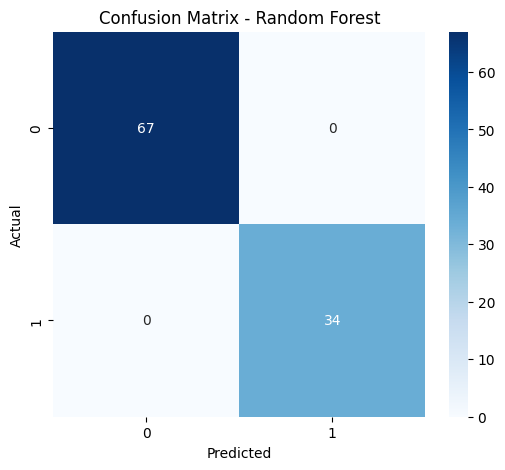


For class 0:
  True Positives (TP): 67
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 34

For class 1:
  True Positives (TP): 34
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 67
Support Vector Classifier Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      1.00      0.99        34

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Cross-validation scores: [1.         0.94594595 0.98648649 1.         0.98648649]
Mean CV score: 0.9837837837837838
Confusion Matrix for Support Vector Classifier:
[[66  1]
 [ 0 34]]


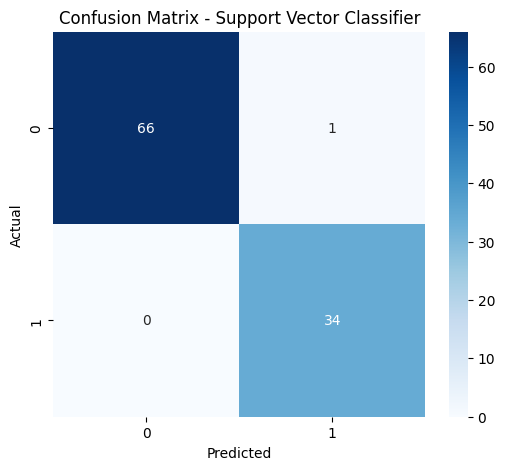


For class 0:
  True Positives (TP): 66
  False Positives (FP): 0
  False Negatives (FN): 1
  True Negatives (TN): 34

For class 1:
  True Positives (TP): 34
  False Positives (FP): 1
  False Negatives (FN): 0
  True Negatives (TN): 66
Xgb classifier Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      1.00      0.99        34

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Cross-validation scores: [0.97297297 1.         0.95945946 1.         0.97297297]
Mean CV score: 0.981081081081081
Confusion Matrix for Xgb classifier:
[[66  1]
 [ 0 34]]


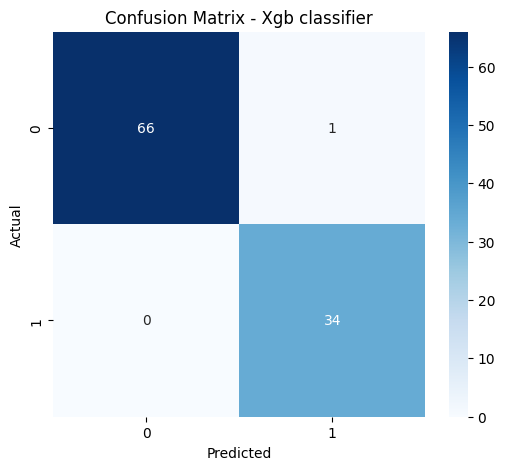


For class 0:
  True Positives (TP): 66
  False Positives (FP): 0
  False Negatives (FN): 1
  True Negatives (TN): 34

For class 1:
  True Positives (TP): 34
  False Positives (FP): 1
  False Negatives (FN): 0
  True Negatives (TN): 66
Decision tree classifier Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      1.00      0.99        34

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Cross-validation scores: [0.95945946 0.94594595 0.93243243 0.93243243 0.94594595]
Mean CV score: 0.9432432432432432
Confusion Matrix for Decision tree classifier:
[[66  1]
 [ 0 34]]


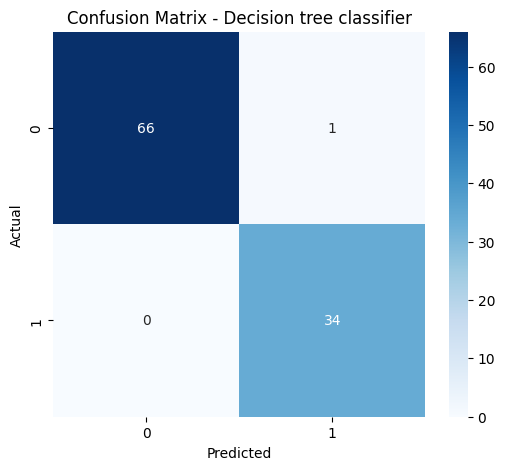


For class 0:
  True Positives (TP): 66
  False Positives (FP): 0
  False Negatives (FN): 1
  True Negatives (TN): 34

For class 1:
  True Positives (TP): 34
  False Positives (FP): 1
  False Negatives (FN): 0
  True Negatives (TN): 66


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'Xgb classifier': XGBClassifier(),
    'Decision tree classifier': DecisionTreeClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    for i in range(cm.shape[0]): 
        TP = cm[i, i]  
        FP = np.sum(cm[:, i]) - TP  
        FN = np.sum(cm[i, :]) - TP  
        TN = np.sum(cm) - (TP + FP + FN)  

        print(f"\nFor class {i}:")
        print(f"  True Positives (TP): {TP}")
        print(f"  False Positives (FP): {FP}")
        print(f"  False Negatives (FN): {FN}")
        print(f"  True Negatives (TN): {TN}")




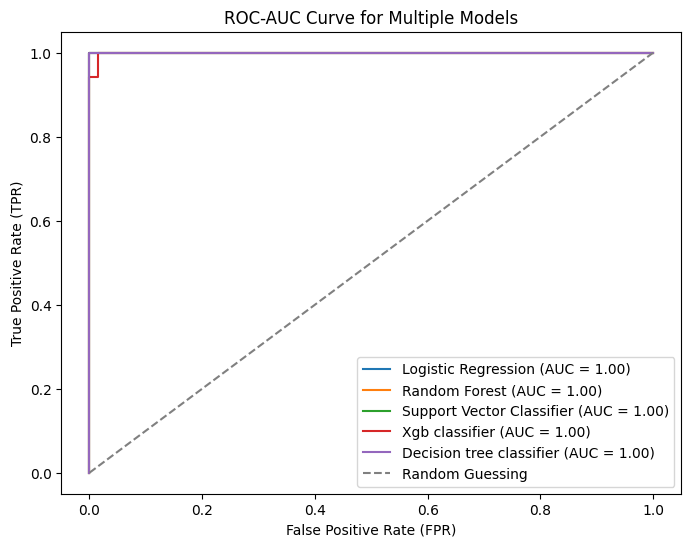

In [76]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Multiple Models")
plt.legend()
plt.show()

### Hyperparameters of the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score:  0.991891891891892
Test Accuracy:  1.0


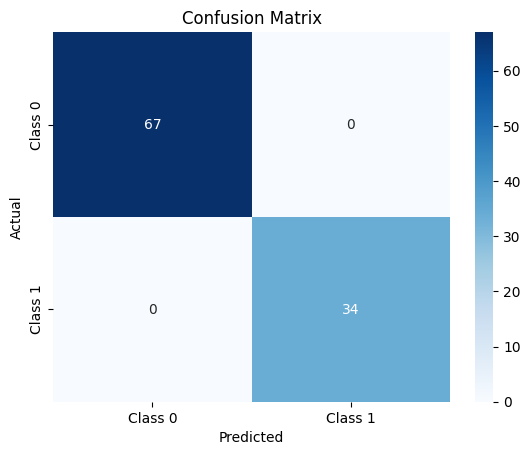

In [88]:
y_pred = best_rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
import pickle
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Model saved successfully!")

Model saved successfully!
